# Decision Tree Classifier Assignment

### importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing Dataset

In [2]:
# importing
import os

# change directory
os.chdir('C:/Users/JYOTHSNA/OneDrive/BTech/Externship/Datasets')

In [3]:
# dataset
df = pd.read_csv('diabetes.csv')

### Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
Pregnancies                 549 non-null int64
Glucose                     549 non-null int64
BloodPressure               549 non-null int64
SkinThickness               549 non-null int64
Insulin                     549 non-null int64
BMI                         549 non-null float64
DiabetesPedigreeFunction    549 non-null float64
Age                         549 non-null int64
Diabetes                    549 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 38.7+ KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,8,183,64,0,0,23.3,0.672,32,pos
2,0,137,40,35,168,43.1,2.288,33,pos
3,3,78,50,32,88,31.0,0.248,26,pos
4,2,197,70,45,543,30.5,0.158,53,pos


### Checking for Null Values

In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

**No Null Values in the Dataset**

### Data Visualization

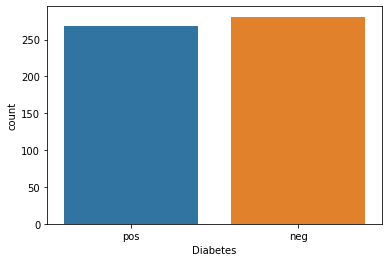

In [7]:
sns.countplot(x = df['Diabetes'], data = df)

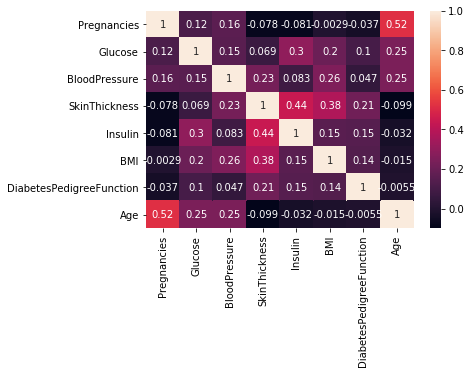

In [8]:
sns.heatmap(df.corr(), annot = True)

### Split the Dependent and Independent Variables

In [9]:
# Independent Variables

x = df.iloc[:, 0:8]

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,8,183,64,0,0,23.3,0.672,32
2,0,137,40,35,168,43.1,2.288,33
3,3,78,50,32,88,31.0,0.248,26
4,2,197,70,45,543,30.5,0.158,53


In [11]:
# Dependent Variable

y = df.iloc[:, -1]

In [12]:
y.head()

0    pos
1    pos
2    pos
3    pos
4    pos
Name: Diabetes, dtype: object

### Training and Testing Data

In [13]:
# importing

from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Building the Model

In [15]:
# importing

from sklearn.tree import DecisionTreeClassifier

# object creation

tree_model = DecisionTreeClassifier()

In [16]:
# training the model

tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

### Predicting the Data

In [17]:
# predicting

predictions = tree_model.predict(x_test)

In [18]:
predictions

array(['neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg',
       'pos', 'neg'], dtype=object)

### Accuracy

In [19]:
# importing

from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print("Confusion Matrix = \n", confusion_matrix(y_test, predictions))

print()

print("Classification Report = \n", classification_report(y_test, predictions))

Confusion Matrix = 
 [[46 16]
 [16 32]]

Classification Report = 
               precision    recall  f1-score   support

         neg       0.74      0.74      0.74        62
         pos       0.67      0.67      0.67        48

    accuracy                           0.71       110
   macro avg       0.70      0.70      0.70       110
weighted avg       0.71      0.71      0.71       110



### Important Features:


    - Based on which features, Decision Tree is constructed and the outputs are predicted

In [21]:
# Feature Importance in sorted order


features = pd.DataFrame(tree_model.feature_importances_, index = x_train.columns, columns = ['Features Important'])

In [22]:
features.sort_values('Features Important', ascending = False)

,Features Important
Glucose,0.334204
BMI,0.175879
Age,0.141158
DiabetesPedigreeFunction,0.100675
BloodPressure,0.080724
Pregnancies,0.073133
SkinThickness,0.048012
Insulin,0.046215


            - As we can see, here "Insulin" and "Skin Thickness" are given least importance.

### Checking with important features

In [23]:
# Independent Variable

x = df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Pregnancies']]

In [24]:
# Dependent Variable

y = df[['Diabetes']]

In [25]:
# Train, test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
# Model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [27]:
predictions

array(['neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg',
       'pos', 'neg'], dtype=object)

In [28]:
# Accuracy

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.77      0.74      0.75        62
         pos       0.68      0.71      0.69        48

    accuracy                           0.73       110
   macro avg       0.72      0.73      0.72       110
weighted avg       0.73      0.73      0.73       110



        - Accuracy before is 71%
        
        - Now it is increased to 73%
        


### Checking by removing some more columns

In [29]:
# Independent Variable

x = df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]

In [30]:
# Dependent Variable

y = df[['Diabetes']]

In [31]:
# Train, test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
# Model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [33]:
predictions

array(['neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg'], dtype=object)

In [34]:
# Accuracy

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.77      0.69      0.73        62
         pos       0.65      0.73      0.69        48

    accuracy                           0.71       110
   macro avg       0.71      0.71      0.71       110
weighted avg       0.72      0.71      0.71       110



       - The Accuracy has been reduced again.
       

**Important Features for Predicting Diabetes are: 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Pregnancies' in this dataset**

-------------------------





---------------------------------

# Random Forest Classifier Assignment

### importing the dataset

In [35]:
import os

os.chdir('C:/Users/JYOTHSNA/OneDrive/BTech/Externship/Datasets')

In [36]:
# dataset

df = pd.read_csv('diabetes.csv')

        - Since the dataset has no null values, we can build the model

### Split Dependent and Independent Variables

In [37]:
# independent

x = df.iloc[:, 0:8]

In [38]:
# dependent

y = df.iloc[:, -1]

### Train and Test the Data

In [39]:
# importing

from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Build the Model

In [41]:
# importing

from sklearn.ensemble import RandomForestClassifier


# object creation

# The accuracy can be varied based on the number of estimator tress

rfc = RandomForestClassifier(n_estimators = 70)

In [42]:
# train the model

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70)

### Predicting

In [43]:
preds = rfc.predict(x_test)

In [44]:
preds

array(['pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg'], dtype=object)

### Accuracy

In [45]:
# importing

from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print("Confusion Matrix = \n", confusion_matrix(y_test, preds))
print("\n")
print("Classification Report = \n", classification_report(y_test, preds))

Confusion Matrix = 
 [[44 18]
 [ 9 39]]


Classification Report = 
               precision    recall  f1-score   support

         neg       0.83      0.71      0.77        62
         pos       0.68      0.81      0.74        48

    accuracy                           0.75       110
   macro avg       0.76      0.76      0.75       110
weighted avg       0.77      0.75      0.76       110



        - Compared to the Decision Tree Classfier's Accuracy, Random Forest Classifier predicts well.
        
        (Becuase Random Forest constructs multiple decision trees on different subsets of features and predicts the output)

### Increasing the Number of Estimators

In [47]:
rfc = RandomForestClassifier(n_estimators = 100)

In [48]:
# training the model

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
# predciting

preds = rfc.predict(x_test)

In [50]:
# accuracy

from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.85      0.71      0.77        62
         pos       0.69      0.83      0.75        48

    accuracy                           0.76       110
   macro avg       0.77      0.77      0.76       110
weighted avg       0.78      0.76      0.76       110



            - Accuracy has been increased.

In [52]:
# Further increase the number of estimators and some hyperparameters

rfc = RandomForestClassifier(n_estimators = 125)

In [53]:
# train the model

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=125)

In [54]:
# predict

preds = rfc.predict(x_test)

In [55]:
preds

array(['pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg'], dtype=object)

In [56]:
# accuracy

from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.85      0.73      0.78        62
         pos       0.70      0.83      0.76        48

    accuracy                           0.77       110
   macro avg       0.78      0.78      0.77       110
weighted avg       0.78      0.77      0.77       110



            - Accuracy is same as the before.

**Further increase in the number of estimators, decrease in the accuracy**